In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import pandas as pd

In [4]:
n = 1000
mean = 1

O = uniform.rvs(size = n, loc = - np.pi / 2, scale = np.pi)
U = uniform.rvs(size = n)
W = - mean * np.log(1 - U)

In [5]:
def plot(X, alpha):
    plt.figure(figsize = (5,2))
    plt.hist(X, bins = 15, label = "Generated r.v.")
    plt.title("Generated Stable Random Variables with alpha = %.2f" %alpha)
    plt.legend()
    plt.show()

In [31]:
def cdf(X, alpha):
    count, bins_count = np.histogram(X, bins = 15)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    plt.figure(figsize = (5,2))
    plt.title("CDF with alpha = %.2f" %alpha)
    plt.plot(bins_count[1:], pdf, label = 'PDF', alpha = 0.5)
    plt.plot(bins_count[1:], cdf, label = 'CDF', alpha = 0.5)
    plt.legend()
    plt.show()
    return pdf
    

In [129]:
def cdf(X, alpha):
    count, bins_count = np.histogram(X, bins = len(X))
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    plt.figure(figsize = (5,2))
    plt.title("CDF with alpha = %.2f" %alpha)
    plt.scatter(bins_count[1:], pdf, label = 'PDF', alpha = 0.5)
    plt.scatter(bins_count[1:], cdf, label = 'CDF', alpha = 0.5)
    plt.legend()
    plt.show()
    return cdf

# Stable distribution

In [29]:
def stable(O, W, alpha, beta):
    if alpha == 1:
        Z = 2 / np.pi * ((np.pi / 2 + beta * O) * np.tan(O) - beta * np.log(np.pi / 2 * W * np.cos(O) / (np.pi / 2 + beta * O)))
    else:
        O_0 = np.arctan(beta * np.tan(np.pi * alpha / 2)) / alpha
        Z = np.sin(alpha * (O_0 + O)) / (np.cos(alpha * O_0) * np.cos(O))**(1/alpha) * ((np.cos(alpha * O_0 + (alpha - 1) * O)) / W)**((1-alpha)/alpha)
    return Z

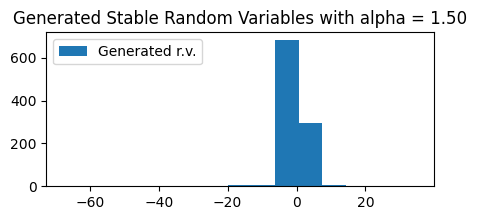

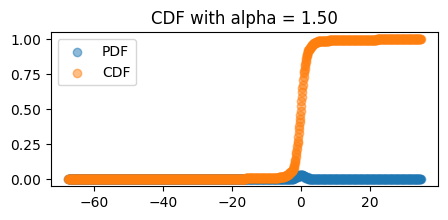

In [134]:
a = 1.5
beta = 0

Z = stable(O, W, alpha, beta)
plot(Z, alpha)
F = cdf(Z, alpha)

# Empirical CDF

In [143]:
Zp = Z[Z>0]
df = sorted(Zp)
#print(x)

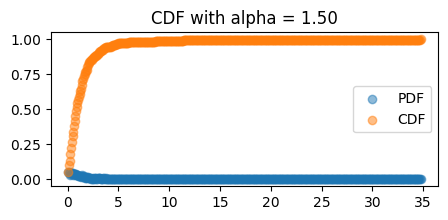

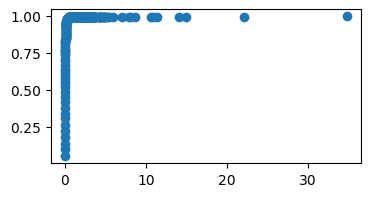

In [144]:
F = cdf(Zp, alpha)

plt.figure(figsize = (4,2))
plt.scatter(df, F)
plt.show()

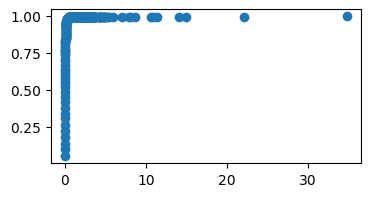

In [145]:
#x_0, F = cdf(x, alpha)

plt.figure(figsize = (4,2))
plt.scatter(df, F)
plt.show()

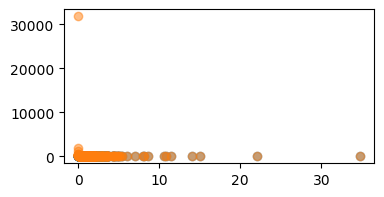

In [154]:
#x_0, F = cdf(x, alpha)

plt.figure(figsize = (4,2))
plt.scatter(df, 1-F, alpha = 0.5)

plt.scatter(df, np.power(df, -a), alpha = 0.5)

plt.show()

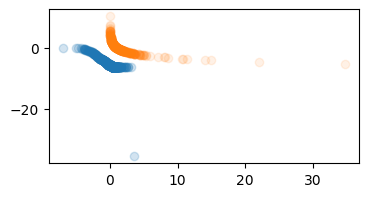

In [155]:
#x_0, F = cdf(x, alpha)

plt.figure(figsize = (4,2))
plt.scatter(np.log(df), np.log(1-F), alpha = 0.2)

plt.scatter(df, -a*np.log(df), alpha = 0.1)

plt.show()

# Characteristic function

In [167]:
t = 1
phi = 1 / n * sum(np.exp(1j * t * Z))

In [168]:
phi

(0.3885680515286858-0.017475978727399304j)

In [171]:
phi = np.exp(-np.abs(Z)**a)

In [ ]:
phi

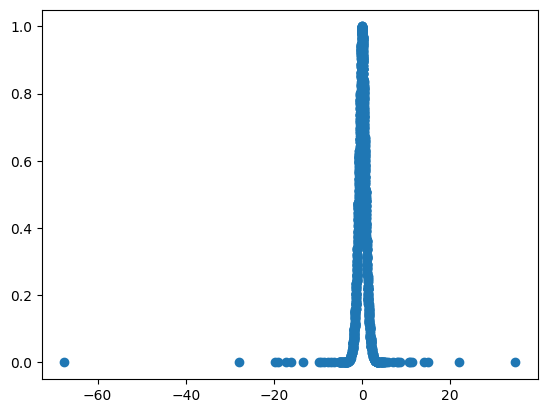

In [173]:
plt.scatter(Z, phi)

In [157]:
len(Z)

1000

In [158]:
n

1000

In [166]:
type(1j)

complex

In [61]:
Z_ln = [np.log(x) if x > 0 else x for x in Z]
#Z_ln